Phân tích biến động giá cổ phiếu FPT <br>
Người thực hiện: Đỗ Việt Bách <br>
Phone: 0559 686 243 <br>
Email: 19521230@gm.uit.edu.vn <br>
Dataset: Giá trị cổ phiếu FPT từ ngày 25/12/2018 tới ngày 22/12/2020 <br>
Mô hình dự báo: RNN vs. GRU

##Import dữ liệu và thư viện cần thiết

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FPT.csv to FPT (1).csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/FPT.csv')

In [ ]:
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


##Làm sạch dữ liệu

In [ ]:
# Xem kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


In [ ]:
# Kiểm tra hàng trùng lặp
df.duplicated().any()

False

In [ ]:
# Kiểm tra Null
df.isnull().any()

Ticker           False
Date/Time        False
Open             False
High             False
Low              False
Close            False
Volume           False
Open Interest    False
dtype: bool

In [ ]:
# Kiểm tra các giá trị min, max, mean(giá trị trung bình), standard(độ lệch chuẩn) của mỗi cột
df.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [ ]:
import matplotlib.pyplot as plt

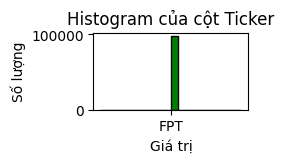

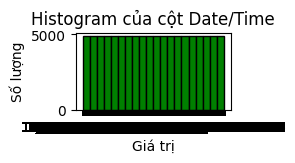

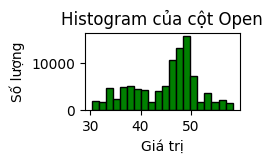

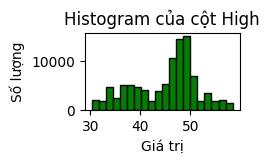

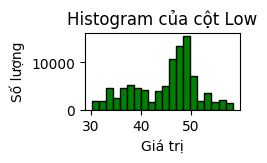

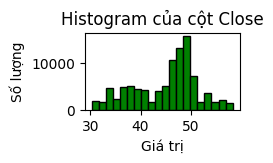

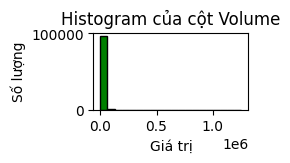

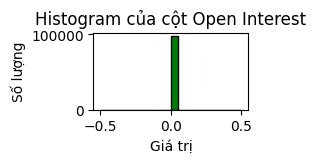

In [ ]:
# Sử dụng Histogram để kiểm tra sự phân bổ giá trị trong mỗi cột
for column in df.columns:
    plt.figure(figsize=(2, 1))
    plt.hist(df[column], bins=20, color='green', edgecolor='black')
    plt.title(f'Histogram của cột {column}')
    plt.xlabel('Giá trị')
    plt.ylabel('Số lượng')
    plt.show()

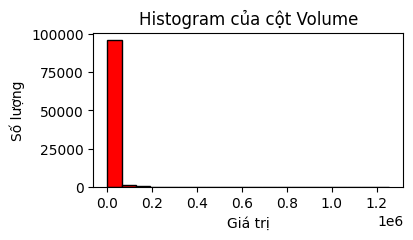

In [ ]:
# Kiểm tra Histogram của cột Volume
plt.figure(figsize=(4, 2))
plt.hist(df['Volume'], bins=20, color='red', edgecolor='black')
plt.title('Histogram của cột Volume')
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')
plt.show()

### Nhận xét dữ liệu
+ Cột Volume có sự chênh lệch lớn giữa các giá trị, có thể làm dự báo sai lệch.
+ Ở đây bài toán đặt ra là dự báo giá trị cổ phiếu thì em sẽ sử dụng cột Close làm thuộc tính quyết định để dự báo. Do các cột Open, High, Low có sự tương đồng nên loại bỏ để giảm thời gian thực thi.
+ Để tăng Accuracy của thuật toán thì sẽ sử dụng Scale giá trị cột Close bằng công thức: (Giá trị - min)/(max - min)

In [ ]:
# Trích xuất cột Close từ Dataset
df1 = df.reset_index()['Close']
df1 = df1.reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale cột Close và lưu vào mảng
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.02273535],
       [0.01989343],
       [0.01740675],
       ...,
       [0.9928952 ],
       [0.98934281],
       [0.98934281]])

##Phân tích dữ liệu

### Phương pháp sử dụng
- Đề bài là phân tích biến động giá cổ phiếu, ở đây em lựa chọn giá cổ phiếu giờ đóng cửa (Close) để phân tích.
- Đối với tập dữ liệu này có 3 phương pháp phổ biến để phân tích:
  + 1.Phương pháp phân tích chuỗi thời gian (Time Series Analysis): ARIMA, SARIMA ...
  + 2.Phương pháp Machine Learning : Linear Regression, KNN ...
  + 3.Phương pháp Deep Learning
- Với bài toán dự báo xu hướng giá trị em sẽ sử dụng 2 mô hình Recurrent Neural Network (RNN) và mô hình Gated Recurrent Unit (GRU) nằm trong phương pháp Deep Learning. Trong phương pháp này mô hình Long short term memory (LSTM) có Accuracy tốt hơn, nhưng với tập dữ liệu có 97406 dòng thì LSTM có thời gian thực thi lâu hơn rất nhiều do sử dụng nhiều tham số.

In [ ]:
# Chia dữ liệu thành 3 phần Train, Test, Validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
train_data

array([[0.02273535],
       [0.01989343],
       [0.01740675],
       ...,
       [0.65008881],
       [0.65186501],
       [0.65186501]])

In [ ]:
test_data

array([[0.65008881],
       [0.64831261],
       [0.65008881],
       ...,
       [0.81172291],
       [0.80817052],
       [0.81172291]])

In [ ]:
val_data

array([[0.81172291],
       [0.81172291],
       [0.80817052],
       ...,
       [0.9928952 ],
       [0.98934281],
       [0.98934281]])

### Mô hình RNN

In [ ]:
# Gọi các thư viện cần thiết để xây dựng RNN
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
train_data_RNN = train_data
test_data_RNN = test_data
val_data_RNN = val_data

In [ ]:
# Hàm Create Dataset để chuyển đổi mảng thành ma trận
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# Sử dụng hàm Create Dataset để chuyển đổi các mảng Train, Test, Validate
time_step = 100
x_train_RNN, y_train_RNN = create_dataset(train_data_RNN, time_step)
x_val_RNN, y_val_RNN = create_dataset(val_data_RNN, time_step)
x_test_RNN, y_test_RNN = create_dataset(test_data_RNN, time_step)

In [ ]:
# Reshape đầu vào để phù hợp với mô hình RNN
x_train_RNN =x_train_RNN.reshape(x_train_RNN.shape[0],x_train_RNN.shape[1] , 1)
x_test_RNN = x_test_RNN.reshape(x_test_RNN.shape[0],x_test_RNN.shape[1] , 1)
x_val_RNN = x_val_RNN.reshape(x_val_RNN.shape[0],x_val_RNN.shape[1] , 1)

In [ ]:
# Khai báo mô hình RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# Fit mô hình với dữ liệu Train
model.fit(x_train_RNN, y_train_RNN, validation_data = (x_test_RNN, y_test_RNN),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1064/1064 [==============================] - 22s 19ms/step - loss: 1.1058e-04 - val_loss: 2.2765e-05
Epoch 2/100
1064/1064 [==============================] - 35s 33ms/step - loss: 9.3904e-06 - val_loss: 6.1786e-06
Epoch 3/100
1064/1064 [==============================] - 23s 22ms/step - loss: 8.1760e-06 - val_loss: 1.0443e-05
Epoch 4/100
1064/1064 [==============================] - 25s 24ms/step - loss: 8.1895e-06 - val_loss: 1.7741e-05
Epoch 5/100
1064/1064 [==============================] - 27s 25ms/step - loss: 7.8534e-06 - val_loss: 1.0890e-05
Epoch 6/100
1064/1064 [==============================] - 33s 31ms/step - loss: 7.1011e-06 - val_loss: 5.8592e-06
Epoch 7/100
1064/1064 [==============================] - 31s 29ms/step - loss: 6.7576e-06 - val_loss: 1.6221e-05
Epoch 8/100
1064/1064 [==============================] - 19s 18ms/step - loss: 7.2473e-06 - val_loss: 5.8661e-06
Epoch 9/100
1064/1064 [==============================] - 20s 19ms/step - loss: 6.8402e-06 - val_

In [ ]:
# Dự báo dữ liệu train_predict_RNN, y_pred_RNN, y_pred_val_RNN
train_predict_RNN = model.predict(x_train_RNN)
y_pred_RNN = model.predict(x_test_RNN)
y_pred_val_RNN = model.predict(x_val_RNN)

302/302 [==============================] - 2s 5ms/step


In [ ]:
# Đảo ngược giá trị dự đoán trên tập Test và Validate về giá trị chuẩn
train_predict_RNN = scaler.inverse_transform(train_predict_RNN)
y_pred_RNN = scaler.inverse_transform(y_pred_RNN)
y_pred_val_RNN = scaler.inverse_transform(y_pred_val_RNN)

In [ ]:
# Đảo ngược giá trị thực tế của tập Test và Validate về giá trị chuẩn
real_val_RNN = scaler.inverse_transform(y_val_RNN.reshape(-1, 1))
real_test_RNN = scaler.inverse_transform(y_test_RNN.reshape(-1, 1))

In [ ]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse_RNN = np.sqrt(np.mean((y_pred_RNN - real_test_RNN)**2))
val_rmse_RNN = np.sqrt(np.mean((y_pred_val_RNN - real_val_RNN)**2))
print('Testing RMSE:', test_rmse_RNN)
print('Validation RMSE:', val_rmse_RNN)

Testing RMSE: 0.061011084923566626
Validation RMSE: 0.12979233650758107


In [ ]:
# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape_RNN = np.mean((np.absolute(real_test_RNN - y_pred_RNN)/real_test_RNN)*100)
val_mape_RNN = np.mean((np.absolute(real_val_RNN - y_pred_val_RNN)/real_val_RNN)*100)
print('Testing MAPE:', test_mape_RNN)
print('Validation MAPE:', val_mape_RNN)

Testing MAPE: 0.07876879515850632
Validation MAPE: 0.19603730340028458


In [ ]:
# Tính phần trăm độ chính xác trên tập Test và Validate
data_range_RNN = df['Close'].max() - df['Close'].min()
test_accuracy_RNN = (1 - test_rmse_RNN / data_range_RNN) * 100
val_accuracy_RNN = (1 - val_rmse_RNN / data_range_RNN) * 100
print('Testing Accuracy (%):', test_accuracy_RNN)
print('Validation Accuracy (%):', val_accuracy_RNN)

Testing Accuracy (%): 99.7832643519589
Validation Accuracy (%): 99.53892598043488


In [ ]:
# Dự báo 15 stage tiếp theo
x_input_RNN = val_data_RNN[60:].reshape(1, -1)
x_input_RNN.shape

temp_input_RNN = list(x_input_RNN)
temp_input_RNN = temp_input_RNN[0].tolist()

lst_output_RNN = []
n_steps_RNN = 9680
i = 0
while i < 15:
    if len(temp_input_RNN) > 9680:
          x_input_RNN = np.array(temp_input_RNN[1:])

          x_input_RNN = x_input_RNN.reshape(1, -1)
          x_input_RNN = x_input_RNN.reshape((1, n_steps_RNN, 1))
          yhat = model.predict(x_input_RNN, verbose=0)

          temp_input_RNN.extend(yhat[0].tolist())
          temp_input_RNN = temp_input_RNN[1:]
          lst_output_RNN.extend(yhat.tolist())
          i = i + 1
    else:
        x_input_RNN = x_input_RNN.reshape((1, n_steps_RNN, 1))
        yhat = model.predict(x_input_RNN, verbose=0)
        print(yhat[0])
        temp_input_RNN.extend(yhat[0].tolist())
        print(len(temp_input_RNN))
        lst_output_RNN.extend(yhat.tolist())
        i = i + 1

# Chuẩn hóa lại dự đoán 15 stage
predicted_values_RNN = np.array(lst_output_RNN)
predicted_values_RNN = predicted_values_RNN.reshape(-1, 1)

# Chuẩn hóa dự đoán
predicted_values_RNN = scaler.inverse_transform(predicted_values_RNN)

print("Dự đoán 15 stage tiếp theo:")
print(predicted_values_RNN)

Dự đoán 15 stage tiếp theo:
[[57.90682345]
 [57.7402176 ]
 [57.58211519]
 [57.42853297]
 [57.27672594]
 [57.12770081]
 [56.98242405]
 [56.84125472]
 [56.70386395]
 [56.56960744]
 [56.43714961]
 [56.30764148]
 [56.18121728]
 [56.05718572]
 [55.93576156]]


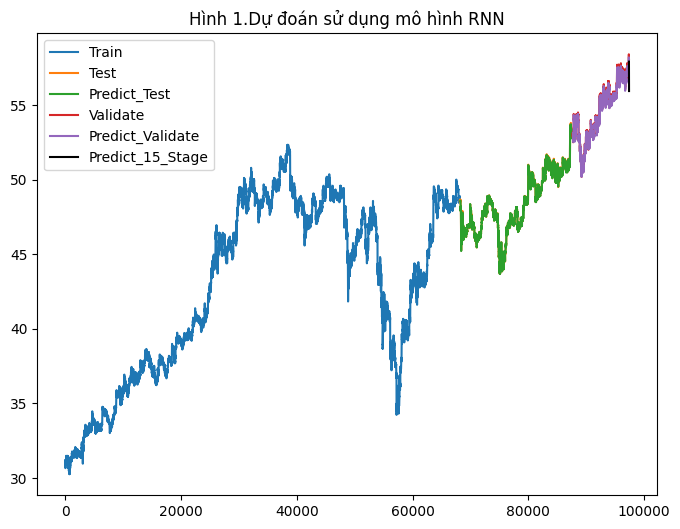

In [ ]:
# Vẽ hình
plt.figure(figsize=(8, 6))
train_data_index_RNN = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data_RNN))
test_data_index_RNN = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index_RNN, scaler.inverse_transform(test_data_RNN))
test_data_index_RNN = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index_RNN,(y_pred_RNN))
val_data_index_RNN = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index_RNN, scaler.inverse_transform(val_data_RNN))
val_data_index_RNN = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index_RNN, y_pred_val_RNN)
predict_data_index_RNN = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+14, step=1)
plt.plot(predict_data_index_RNN, scaler.inverse_transform(lst_output_RNN), color='black')
plt.title('Hình 1.Dự đoán sử dụng mô hình RNN')
plt.legend(['Train','Test','Predict_Test','Validate','Predict_Validate','Predict_15_Stage'])
plt.show()

#### Nhận xét
- Kết quả dự báo 15 stage tiếp theo bằng mô hình RNN là pha giảm giá trị cổ phiếu.
- Độ chính xác của thuật toán dựa trên các thang đo RMSE và MAPE là rất cao.
- Độ chính xác của thuật toán để dự báo trên tập Test và Validate khoảng 99.8%.
- Nhìn trên ảnh ta thấy:
  + Kết quả dự báo trên tập Test (màu xanh) gần như trùng khớp với kết quả thực tế trên tập Test (màu vàng).
  + Kết quả dự báo trên tập Validate (màu tím) gần như trùng khớp với kết quả thực tế trên tập Validate (đỏ).
- Mô hình RNN không phải mô hình thường xuyên để sử dụng phân tích sự biến thiên của giá trị cổ phiếu. Điểm yếu của mô hình này là gặp vấn đề biến mất và vượt quá gradient (vanishing and exploding gradient) dẫn đến dự báo xu hướng trong các stage tiếp theo có sự giảm khá lớn (khoảng 0.2) nhưng thực tế có vẻ là 0.1
- Mặc dù vậy, điểm mạnh của mô hình là thực thi nhanh hơn so với các mô hình mạng neural khác như RNN và LSTM.
- => Nên sử dụng các mô hình như GRU và LSTM để dự báo chính xác hơn.

### Mô hình GRU

In [ ]:
# Gọi các thư viện cần thiết để xây dựng RNN
from keras.models import Sequential
from keras.layers import Dense, GRU, BatchNormalization

In [ ]:
train_data_GRU = train_data
test_data_GRU = test_data
val_data_GRU = val_data

In [ ]:
# Hàm Create Dataset để chuyển đổi mảng thành ma trận
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# Sử dụng hàm Create Dataset để chuyển đổi các mảng Train, Test, Validate
time_step = 100
x_train_GRU, y_train_GRU = create_dataset(train_data_GRU, time_step)
x_val_GRU, y_val_GRU = create_dataset(val_data_GRU, time_step)
x_test_GRU, y_test_GRU = create_dataset(test_data_GRU, time_step)

In [ ]:
# Reshape đầu vào để phù hợp với mô hình GRU
x_train_GRU = x_train_GRU.reshape(x_train_GRU.shape[0], x_train_GRU.shape[1] , 1)
x_test_GRU = x_test_GRU.reshape(x_test_GRU.shape[0], x_test_GRU.shape[1] , 1)
x_val_GRU = x_val_GRU.reshape(x_val_GRU.shape[0], x_val_GRU.shape[1] , 1)

In [ ]:
# Khai báo mô hình GRU
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fit mô hình với dữ liệu Train
model.fit(x_train_GRU, y_train_GRU, validation_data = (x_test_GRU, y_test_GRU), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
1064/1064 [==============================] - 58s 53ms/step - loss: 0.0019 - val_loss: 6.8686e-06
Epoch 2/100
1064/1064 [==============================] - 53s 50ms/step - loss: 8.0241e-06 - val_loss: 6.1190e-06
Epoch 3/100
1064/1064 [==============================] - 53s 50ms/step - loss: 7.5324e-06 - val_loss: 6.9591e-06
Epoch 4/100
1064/1064 [==============================] - 54s 51ms/step - loss: 7.3734e-06 - val_loss: 5.4649e-06
Epoch 5/100
1064/1064 [==============================] - 54s 51ms/step - loss: 7.5011e-06 - val_loss: 6.3782e-06
Epoch 6/100
1064/1064 [==============================] - 54s 51ms/step - loss: 7.4600e-06 - val_loss: 1.0214e-05
Epoch 7/100
1064/1064 [==============================] - 53s 50ms/step - loss: 7.9862e-06 - val_loss: 5.4222e-06
Epoch 8/100
1064/1064 [==============================] - 54s 51ms/step - loss: 7.3888e-06 - val_loss: 4.6158e-06
Epoch 9/100
1064/1064 [==============================] - 53s 50ms/step - loss: 6.8660e-06 - val_loss

In [ ]:
# Dự báo dữ liệu train_predict_GRU, y_pred_GRU, y_pred_val_GRU
train_predict_GRU = model.predict(x_train_GRU)
y_pred_GRU = model.predict(x_test_GRU)
y_pred_val_GRU = model.predict(x_val_GRU)

302/302 [==============================] - 4s 12ms/step


In [ ]:
# Đảo ngược giá trị dự đoán trên tập Test và Validate về giá trị chuẩn
train_predict_GRU = scaler.inverse_transform(train_predict_GRU)
y_pred_GRU = scaler.inverse_transform(y_pred_GRU)
y_pred_val_GRU = scaler.inverse_transform(y_pred_val_GRU)

In [ ]:
# Đảo ngược giá trị thực tế của tập Test và Validate về giá trị chuẩn
real_val_GRU = scaler.inverse_transform(y_val_GRU.reshape(-1, 1))
real_test_GRU = scaler.inverse_transform(y_test_GRU.reshape(-1, 1))

In [ ]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse_GRU = np.sqrt(np.mean((y_pred_GRU - real_test_GRU)**2))
val_rmse_GRU = np.sqrt(np.mean((y_pred_val_GRU - real_val_GRU)**2))
print('Testing RMSE:', test_rmse_GRU)
print('Validation RMSE:', val_rmse_GRU)

Testing RMSE: 0.06086493149748374
Validation RMSE: 0.09021646443318068


In [ ]:
# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape_GRU = np.mean((np.absolute(real_test_GRU - y_pred_GRU)/real_test_GRU)*100)
val_mape_GRU = np.mean((np.absolute(real_val_GRU - y_pred_val_GRU)/real_val_GRU)*100)
print('Testing MAPE:', test_mape_GRU)
print('Validation MAPE:', val_mape_GRU)

Testing MAPE: 0.08270059847456368
Validation MAPE: 0.13043842602605704


In [ ]:
# Tính phần trăm độ chính xác trên tập Test và Validate
data_range_GRU = df['Close'].max() - df['Close'].min()
test_accuracy_GRU = (1 - test_rmse_GRU / data_range_GRU) * 100
val_accuracy_GRU = (1 - val_rmse_GRU / data_range_GRU) * 100
print('Testing Accuracy (%):', test_accuracy_GRU)
print('Validation Accuracy (%):', val_accuracy_GRU)

Testing Accuracy (%): 99.78378354707822
Validation Accuracy (%): 99.67951522403844


In [ ]:
# Dự báo 15 stage tiếp theo
x_input_GRU = val_data_GRU[60:].reshape(1, -1)
x_input_GRU.shape

temp_input_GRU = list(x_input_GRU)
temp_input_GRU = temp_input_GRU[0].tolist()

lst_output_GRU = []
n_steps_GRU = 9681
i = 0
while i < 15:
    if len(temp_input_GRU) > 9681:
          x_input_GRU = np.array(temp_input_GRU[1:])

          x_input_GRU = x_input_GRU.reshape(1, -1)
          x_input_GRU = x_input_GRU.reshape((1, n_steps_GRU, 1))
          yhat = model.predict(x_input_GRU, verbose=0)

          temp_input_GRU.extend(yhat[0].tolist())
          temp_input_GRU = temp_input_GRU[1:]
          lst_output_GRU.extend(yhat.tolist())
          i = i + 1
    else:
        x_input_GRU = x_input_GRU.reshape((1, n_steps_GRU, 1))
        yhat = model.predict(x_input_GRU, verbose=0)

        temp_input_GRU.extend(yhat[0].tolist())

        lst_output_GRU.extend(yhat.tolist())
        i = i + 1

# Chuẩn hóa lại dự đoán 15 stage
predicted_values_GRU = np.array(lst_output_GRU)
predicted_values_GRU = predicted_values_GRU.reshape(-1, 1)

# Chuẩn hóa dự đoán
predicted_values_GRU = scaler.inverse_transform(predicted_values_GRU)

print("Dự đoán 15 stage tiếp theo:")
print(predicted_values_GRU)

Dự đoán 15 stage tiếp theo:
[[58.01511323]
 [57.94246143]
 [57.87003446]
 [57.80019476]
 [57.7315128 ]
 [57.66457918]
 [57.59922612]
 [57.53552072]
 [57.47334386]
 [57.41260662]
 [57.35319825]
 [57.29502815]
 [57.23801075]
 [57.18207557]
 [57.12715383]]


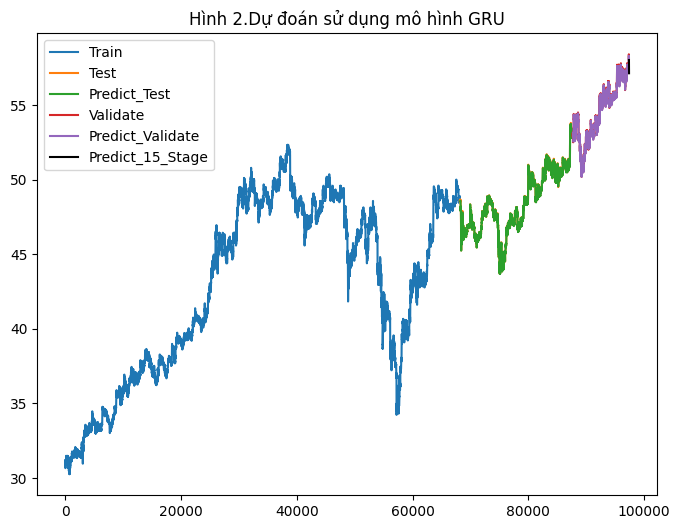

In [ ]:
# Vẽ hình
plt.figure(figsize=(8, 6))
train_data_index_GRU = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data_GRU))
test_data_index_GRU = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index_GRU, scaler.inverse_transform(test_data_GRU))
test_data_index_GRU = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index_GRU, (y_pred_GRU))
val_data_index_GRU = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index_GRU, scaler.inverse_transform(val_data_GRU))
val_data_index_GRU = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index_GRU, y_pred_val_GRU)
predict_data_index_GRU = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+14, step=1)
plt.plot(predict_data_index_GRU, scaler.inverse_transform(lst_output_GRU), color='black')
plt.title('Hình 2.Dự đoán sử dụng mô hình GRU')
plt.legend(['Train','Test','Predict_Test','Validate','Predict_Validate','Predict_15_Stage'])
plt.show()

#### Nhận xét
- Kết quả dự báo 15 stage tiếp theo bằng mô hình RNN là pha giảm giá trị cổ phiếu.
- Độ chính xác của thuật toán dựa trên các thang đo RMSE và MAPE là rất cao.
- Độ chính xác của thuật toán để dự báo trên tập Test và Validate khoảng 99.8%.
- Nhìn trên ảnh ta thấy:
  + Kết quả dự báo trên tập Test (màu xanh) gần như trùng khớp với kết quả thực tế trên tập Test (màu vàng).
  + Kết quả dự báo trên tập Validate (màu tím) gần như trùng khớp với kết quả thực tế trên tập Validate (đỏ).
- Mô hình GRU đã có sự cải tiến rõ rệt so với mô hình RNN. Sự giảm pha của 15 stage tiếp theo khoảng 0.05, trông có vẻ phù hợp với dữ liệu trên.


## Tổng kết

In [ ]:
# So sánh 2 mô hình RNN và GRU
data = {
    'Độ đo': ['Test Accuracy (%)', 'Validation Accuracy (%)', 'Test RMSE', 'Validation RMSE', 'Test MAPE', 'Validation MAPE'],
    'Mô hình RNN': [test_accuracy_RNN, val_accuracy_RNN, test_rmse_RNN, val_rmse_RNN, test_mape_RNN, val_mape_RNN],
    'Mô hình GRU': [test_accuracy_GRU, val_accuracy_GRU, test_rmse_GRU, val_rmse_GRU, test_mape_GRU, val_mape_GRU]
}

df = pd.DataFrame(data).set_index('Độ đo')

print(df)

                         Mô hình RNN  Mô hình GRU
Độ đo                                            
Test Accuracy (%)          99.783264    99.783784
Validation Accuracy (%)    99.538926    99.679515
Test RMSE                   0.061011     0.060865
Validation RMSE             0.129792     0.090216
Test MAPE                   0.078769     0.082701
Validation MAPE             0.196037     0.130438


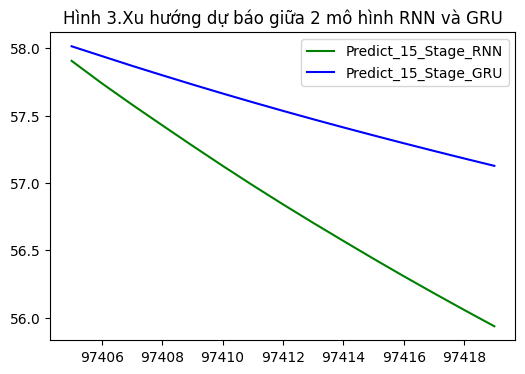

In [ ]:
# Nhận xét Predict 15 stage của 2 mô hình
plt.figure(figsize=(6, 4))
predict_data_index_RNN = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+14, step=1)
plt.plot(predict_data_index_RNN, scaler.inverse_transform(lst_output_RNN), color='green')
predict_data_index_GRU = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+14, step=1)
plt.plot(predict_data_index_GRU, scaler.inverse_transform(lst_output_GRU), color='blue')
plt.title('Hình 3.Xu hướng dự báo giữa 2 mô hình RNN và GRU')
plt.legend(['Predict_15_Stage_RNN', 'Predict_15_Stage_GRU'])
plt.show()

### Tổng kết
- Nhìn ảnh so sánh trên, ta thấy mô hình GRU dự đoán pha giảm của các stage tiếp theo tốt hơn mô hình RNN.
- Tuy nhiên, ở đây em mới chỉ phân tích dựa trên giá trị cổ phiếu đóng cửa (Close). Em đã bỏ qua phân tích một thuộc tính khá quan trọng là lưu lượng mua/bán (Volume). Ví dụ, Volume đột ngột tăng mạnh và giá trị Close đột ngột giảm mạnh thể hiện người dùng đang bán xả giá trị cổ phiếu đó. Nên đây sẽ là hướng cải tiến mô hình chính xác hơn nữa, tránh trường hợp bị overfitting.